In [64]:
library(tidyverse)
library(ggplot2)
library(stringr)

library(rvest)
library(purrr)
library(polite)
options(repr.plot.width=15, repr.plot.height=8)

# Covid cases data set Wrangling 

In [65]:
#importing covid_case dataset
covid_case <- read.csv("https://raw.githubusercontent.com/andyholmes1210/DATA201-Project/main/WHO-COVID-19-global-data.csv")
covid_case

ï..Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
2020-01-08,AF,Afghanistan,EMRO,0,0,0,0
2020-01-09,AF,Afghanistan,EMRO,0,0,0,0
2020-01-10,AF,Afghanistan,EMRO,0,0,0,0
2020-01-11,AF,Afghanistan,EMRO,0,0,0,0


In [66]:
#filtering only New zealand
covid_case_new_zealand <- covid_case %>%
    filter(Country == "New Zealand")

#removing unwanted columns
covid_case_new_zealand <- select(covid_case_new_zealand, -Country_code, -WHO_region, -New_deaths, -Cumulative_deaths, -Cumulative_cases)

#renaming column title
covid_case_new_zealand <- covid_case_new_zealand %>% rename(
    Dates = ï..Date_reported,
    Daily_cases = New_cases)

covid_case_new_zealand

Dates,Country,Daily_cases
<chr>,<chr>,<int>
2020-01-03,New Zealand,0
2020-01-04,New Zealand,0
2020-01-05,New Zealand,0
2020-01-06,New Zealand,0
2020-01-07,New Zealand,0
2020-01-08,New Zealand,0
2020-01-09,New Zealand,0
2020-01-10,New Zealand,0
2020-01-11,New Zealand,0


In [67]:
#filtering dates for new zealand covid cases
#to be able to use inner_join with border_crossing later
covid_case_new_zealand <- covid_case_new_zealand %>%
    filter(Dates < "2021-10-12")

#removing unwanted column
covid_case_new_zealand <- select(covid_case_new_zealand, -Country)

covid_case_new_zealand


Dates,Daily_cases
<chr>,<int>
2020-01-03,0
2020-01-04,0
2020-01-05,0
2020-01-06,0
2020-01-07,0
2020-01-08,0
2020-01-09,0
2020-01-10,0
2020-01-11,0


# Border crossing data set wrangling

In [68]:
#importing border crossing data set
border_crossing <- read.csv("https://raw.githubusercontent.com/andyholmes1210/DATA201-Project/main/covid_19_data_portal_Border%20crossings.csv")
border_crossing

ï..class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-01,13322,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-02,15351,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-03,15892,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-04,14771,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-05,14791,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-06,15360,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-07,14629,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-08,15423,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-09,15521,Number,12-10-21


In [77]:
#removing unwanted columns
border_region <- select(border_crossing, -category, -indicator_name, -ï..class, -units, -date_last_updated, -sub_series_name)

#rename column titles
border_region <- border_region %>% rename(
    City = series_name,
    Dates = parameter,
    Border_crossed = value)

border_region

City,Dates,Border_crossed
<chr>,<chr>,<int>
Auckland,2016-01-01,13322
Auckland,2016-01-02,15351
Auckland,2016-01-03,15892
Auckland,2016-01-04,14771
Auckland,2016-01-05,14791
Auckland,2016-01-06,15360
Auckland,2016-01-07,14629
Auckland,2016-01-08,15423
Auckland,2016-01-09,15521


In [78]:
#Getting total border crossing for each day 2020-2021
border_region_new <- border_region %>%
    filter(Dates > "2020-01-02") %>%
    group_by(Dates) %>%
    summarise(Total_border_crossed = sum(Border_crossed))
    

border_region_new

Dates,Total_border_crossed
<chr>,<int>
2020-01-03,25993
2020-01-04,26143
2020-01-05,25264
2020-01-06,24256
2020-01-07,23814
2020-01-08,24745
2020-01-09,24851
2020-01-10,25103
2020-01-11,25487


# Combining both datasets

In [99]:
#Joining bordercrossing region with daily covid cases
bordercrossing_covidcase <- border_region_new %>%
    inner_join(covid_case_new_zealand, by = "Dates")

#changing any NA values to 0
bordercrossing_covidcase[is.na(bordercrossing_covidcase)] <- 0

bordercrossing_covidcase

Dates,Total_border_crossed,Daily_cases
<chr>,<int>,<int>
2020-01-03,25993,0
2020-01-04,26143,0
2020-01-05,25264,0
2020-01-06,24256,0
2020-01-07,23814,0
2020-01-08,24745,0
2020-01-09,24851,0
2020-01-10,25103,0
2020-01-11,25487,0


# Plot bordercrossing against daily covid cases

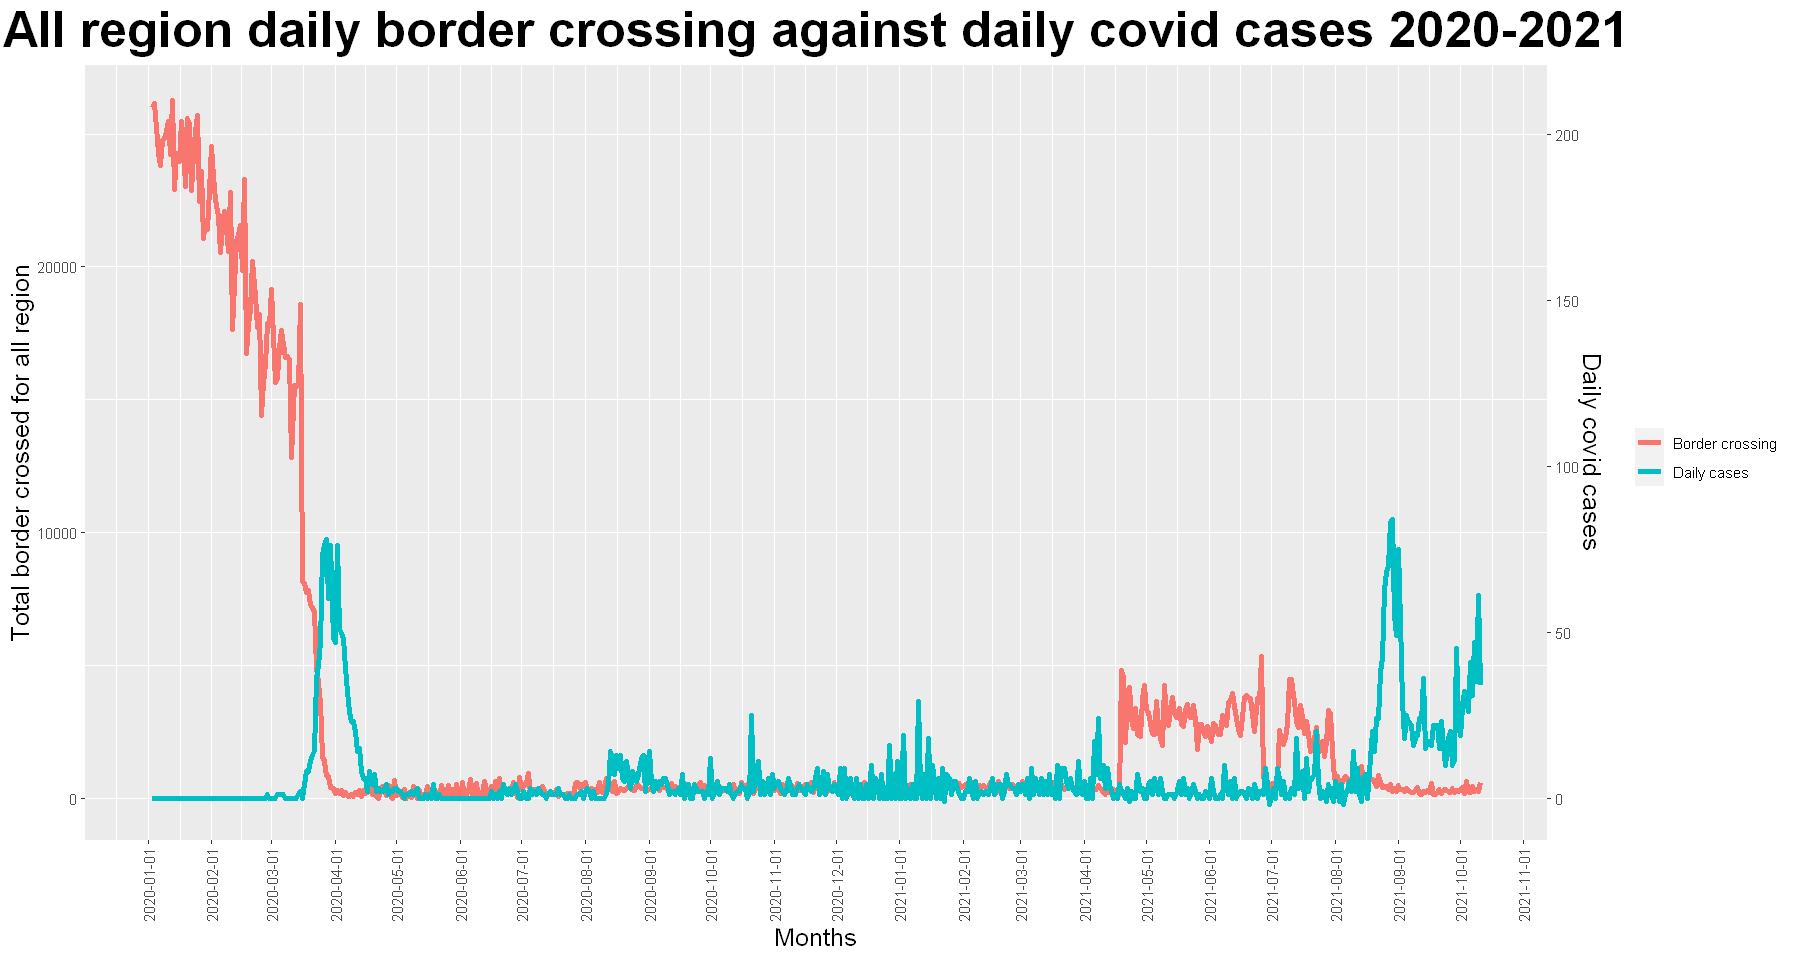

In [100]:
allregionborder_covidcase <- ggplot(bordercrossing_covidcase, aes(x=as.Date(Dates))) + 
    geom_line(aes(y=Total_border_crossed, color="Border crossing"), size=1.5) + #Total border crossing line
    geom_line(aes(y=Daily_cases*125, color="Daily cases"), size=1.5) + #Daily cases line

    scale_x_date(date_labels = "%Y-%m-%d", date_breaks = "1 month") + #Date label on x-axis, monthly intervals
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) + #Rotate Date label on x-axis 
       
    scale_y_continuous( #Label for both y-axis (left and right)
        name = "Total border crossed for all region",
        sec.axis = sec_axis(~./125, name="Daily covid cases")
    ) +

    theme( #Theme for the labels
        axis.title.y = element_text(colour = "black", size=15),
        axis.title.y.right = element_text(colour = "black", size=15),
        axis.title.x = element_text(colour = "black", size=15)
    ) +

    theme(legend.title=element_blank()) + #Removing legend title
    ggtitle('All region daily border crossing against daily covid cases 2020-2021') + #Plot title
    theme(plot.title = element_text(size=30, face="bold", hjust=0.5)) + #Theme for plot title
    labs(x="Months") #X label

allregionborder_covidcase


# 4 Main region border crossing

In [81]:
#comparing border crossing in auckland, christchurch, queenstown and wellington.
border_everything <- border_region %>%
    filter(City %in% c("Auckland", "Christchurch", "Queenstown", "Wellington"),
          Dates > "2020-01-02")

#changing any NA values to 0
border_everything[is.na(border_everything)] <- 0

border_everything

City,Dates,Border_crossed
<chr>,<chr>,<int>
Auckland,2020-01-03,19473
Auckland,2020-01-04,18181
Auckland,2020-01-05,19322
Auckland,2020-01-06,17964
Auckland,2020-01-07,17669
Auckland,2020-01-08,18956
Auckland,2020-01-09,17947
Auckland,2020-01-10,18788
Auckland,2020-01-11,18264


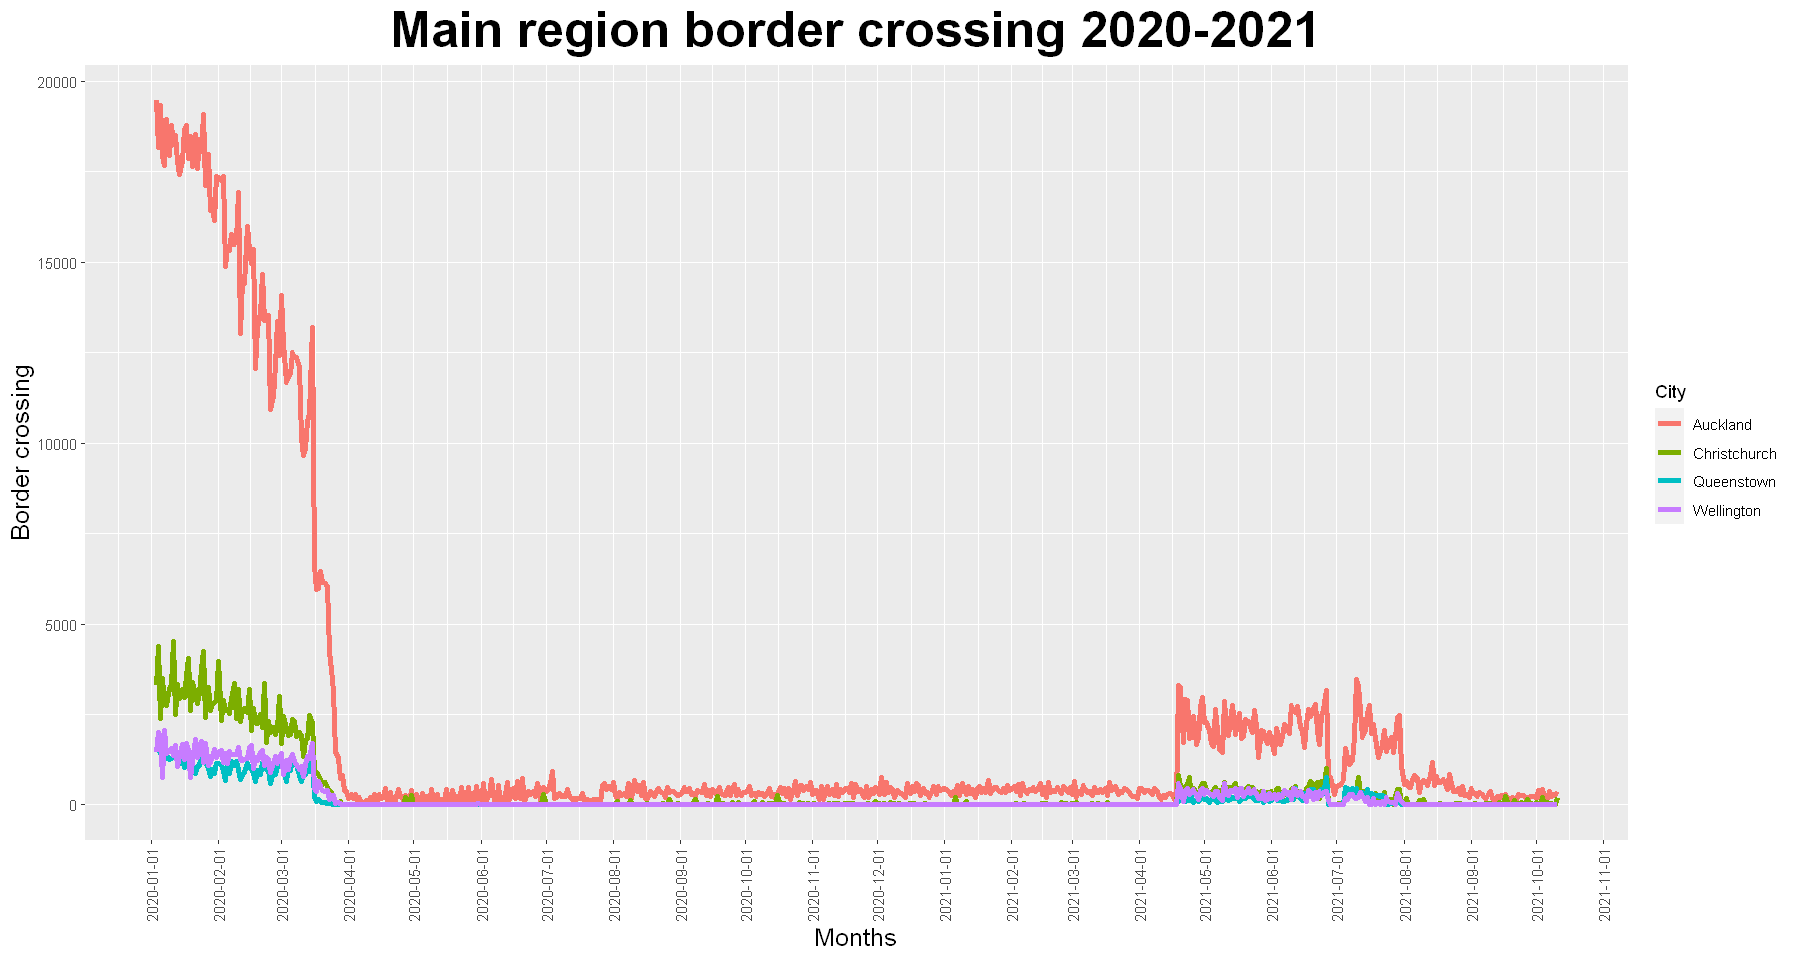

In [97]:
allcities_border_plot <- ggplot(border_everything, aes(x=as.Date(Dates), y=Border_crossed, group=City, color=City)) + 
        geom_line(size=1.5) +
        labs(x="Months", y="Border crossing") + #x-axis and y-axis labels
        scale_x_date(date_labels = "%Y-%m-%d", date_breaks = "1 month") + #Date label on x-axis, monthly intervals
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) + #Rotate Date label on x-axis
        ggtitle('Main region border crossing 2020-2021') + #Plot title
        theme(plot.title = element_text(size=30, face="bold", hjust=0.5)) + #Plot title theme
        theme( #x-axis and y-axis theme
            axis.title.y = element_text(colour = "black", size=15),
            axis.title.x = element_text(colour = "black", size=15)
        ) 
     
allcities_border_plot